# Creating animations

While the ```microplot``` module allows one to create single-frame multi-channel images with annotations, the ```microanim``` module allows one to create interactive plots and save animations of time-lapse versions of such plots. Both modules use an almost identical set of options to render the images and add annotations. 

In [1]:
#%load_ext autoreload
#%autoreload 2

## Dataset

To create an animation, you need a dataset containing multiple frames. As dataset, you can either use a Numpy array with shape CTXY or use one of the ```dataset``` classes. We start with the simplest case of an array and load a complete stack that we reshape:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

In [2]:
image = skimage.io.imread('../demodata/coli_nucl_ori_ter.tif')

## Create the animation object

Now we can use default settings to create an animation object. For that we only need the dataset, here in the form of a Numpy array. **If you use such a Numpy array, by default all channels are plotted. If you don't want that either create a dataset object (see later) or slice your array**.

We will have access to some interactivity to scroll through the frames. So before we start we need to activate Matplotlib's interactive widget mode:

In [3]:
%matplotlib widget

In [4]:
from microfilm.microanim import Microanim

In [5]:
image.shape

(3, 30, 220, 169)

Now we can create the animation object. The animation object takes the same arguments as the ```Microimage``` object. The main difference is that you need to provide in addition a ```data``` parameter which represents your time-lapse images. The ```data``` can be either one of the ```microfilm.dataset``` objects or a simple Numpy array with dimensions ```CTXY``` like ```image``` used here. To get a time slider, you can just use the ```ui``` attribute of the animation object:

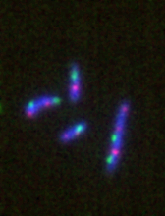

In [7]:
anim = Microanim(data=image, cmaps=['pure_blue','pure_red', 'pure_green'])
anim.ui

Here is an example screen capture of such an animation:

In [8]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_animations_1.gif',width=300)

## Volume data

Just like for the regular images generated by ```microshow```, one can do a movie of a multi-channel projected volume. For this one has to again use the ```volume_proj``` option and pass an array of dimensions ```CTZXY``` (or a ```dataset.Nparray```), for example:

In [36]:
image = skimage.io.imread('../microfilm/dataset/tests/test_folders/coli_nucl_ori_3d.tif')
image.shape

(2, 20, 11, 200, 200)

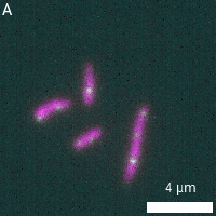

In [41]:
anim = Microanim(
    data=image,
    cmaps=['pure_magenta','pure_cyan'], label_text='A', volume_proj='mean',
    unit='um', scalebar_size_in_units=4, scalebar_unit_per_pix=0.065, fig_scaling=3, scalebar_thickness=0.05)

anim.ui

## Customizing the plot

As mentioned before, you have access to almost all options that you can use in ```microshow``` for the animation. Here's an example where we add a scale bar, a label and adjust the plot size:

In [ ]:
anim = Microanim(
    data=image,
    cmaps=['pure_blue','pure_red', 'pure_green'], label_text='A',
    unit='um', scalebar_size_in_units=4, scalebar_unit_per_pix=0.065, fig_scaling=1, scalebar_thickness=0.05)

anim.ui

In [11]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_animations_2.png',width=300)

### Access to microim

As the animation object is very similar to the simple plot object, you get also access to the same underlying methods e.g. to add a label:

In [13]:
anim.add_label('comment', label_location='upper right', label_font_size=7);
anim.ui

In [13]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_animations_3.png',width=300)

And again, you also get access to the underlying Matplotlib objects like axis:

In [14]:
anim.ax.set_aspect(0.7)
anim.ui

In [15]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_animations_4.png',width=300)

## Adding a time-stamp

As a specific feature for animations, you can add a specific label which is a time stamp. At the moment it can contain hours ``HH``, minutes ```MM```, seconds ```SS``` and milliseconds ```mmm```. To add it to your plot, you just specify the unit (e.g. ```MM``` for minutes), and the number of units per time frame e.g. here 10 min. You can also specify the exact format of your time-stamp with the ```time_format``` option which should be a string containing the abbreviations mentioned above e.g. ```HH, MM```

In [ ]:
anim = Microanim(data=image, cmaps=['pure_blue','pure_red', 'pure_green'],
                unit='um', scalebar_size_in_units=4, scalebar_unit_per_pix=0.065, scalebar_thickness=0.02,
                scalebar_font_size=25, fig_scaling=3)
anim.add_time_stamp('MM', 10, location='lower left')
anim.ui

In [17]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_animations_5.gif',width=300)

Just like for regular plots, you may want to create animations with multiple panels. This is done in the same way as for figures, by assembling pre-made single animations. Find more information in [this section](create_panels.ipynb).

## Exporting the animation

Once you are satisfied with your movie, you may want to export it to integrate it e.g. in a presentation. You can do that easily using the ```save_movie``` method. You can specify the image quality and the frames per second for various movie formats (.mov, .avi, .mpg, .mpeg, .mp4, .mkv, .wmv) and the image format is simply recovered from the file name. You can also export as gif, but don't have access to the ```quality``` option there:

In [18]:
anim.save_movie('movie.mp4', fps=15, quality=5)

[WARNING: _io: 411 2021-07-09 01:12:44,106] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (165, 216) to (176, 224) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [19]:
anim.save_movie('movie.gif', fps=15)

## Using the dataset class

Instead of a plain Numpy array you can pass one of the ```dataset``` objects to the animation constructor. You have here the additional flexibility of choosing which channels to plot for example. Also, if you deal with large images, it is favorable to use a format such as H5 where not the full dataset is loaded into memory.

We keep our simple example, and transform our Numpy array into a ```dataset```. We can specify a name for each channel. Here again, the array format **has to be CTXY**.

In [20]:
from microfilm.dataset import Nparray

data = Nparray(nparray=image, channel_name=['nucleoid', 'ori', 'ter'])

Now we can explicitly specify which channels to plot. For example if you just want a two channels:

In [ ]:
anim = Microanim(data=data, channels=['nucleoid','ori'], cmaps=['pure_red','pure_green'],
                 unit='um', scalebar_size_in_units=4, scalebar_unit_per_pix=0.065, 
                 scalebar_thickness=0.02, scalebar_font_size=40, fig_scaling=5)
anim.add_label('A')
anim.add_time_stamp('MM', 10, location='lower left')

In [22]:
anim.ui

In [23]:
Image(url='https://github.com/guiwitz/microfilm/raw/master/illustrations/create_animations_6.png',width=450)